In [1]:
import os
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import horus as ho

In [2]:
from simsopt.configs import get_w7x_data

In [3]:
w7x = get_w7x_data()

In [4]:
from simsopt.field import Current

In [5]:
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

In [6]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2)

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [7]:
nfieldlines = 50
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]
Rs = np.linspace(6.1, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

<Figure size 640x480 with 0 Axes>

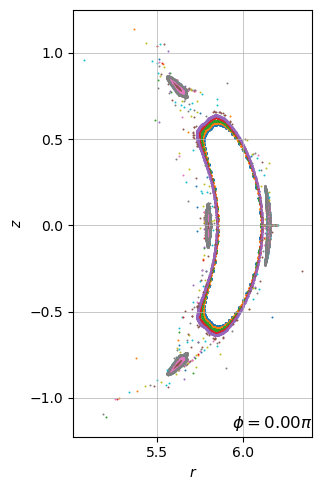

In [9]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [15]:
#import pickle
#pickle.dump(fig, open("output/poincare_figure_GYM000+1750_black.pickle", "wb"))

In [13]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

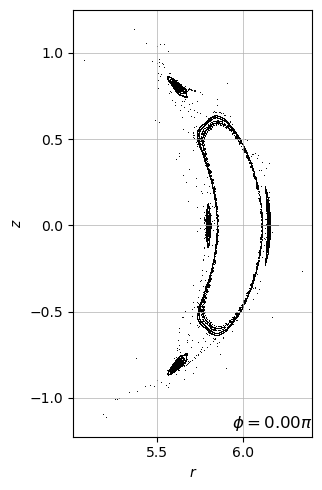

In [14]:
fig

In [16]:
from pyoculus.solvers import FixedPoint
ps = ho.SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 5, bs)

In [17]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-7
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)
result01 = fp.compute(guess=[5.58, 0.7], pp=5, qq=4, sbegin=5.5, send=6.2, tol = 1e-8)

In [20]:
results = [list(p) for p in zip(result01.x, result01.y, result01.z)]

In [21]:
results

[[5.696486104519523, 0.0, 0.5895406185226035],
 [5.765996189738707, 0.0, -0.36641412354848346],
 [5.815089453694582, 0.0, -0.6836300469249732],
 [6.052241330334129, 0.0, 0.3605154833981175],
 [5.73276080016554, 0.0, 0.6037668095353996]]

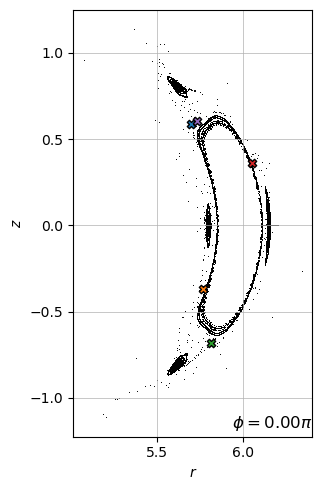

In [42]:
# ax[0,0].scatter(fp.x[5],
#     fp.z[5],
#     marker="X",
#     edgecolors="black",
#     linewidths=1,
# )
fig

AttributeError: 'FixedPoint' object has no attribute 'jacobian'